In [82]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [83]:
mortality_df = pd.read_csv('resources\cleaned.csv')

mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451146 entries, 0 to 1451145
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Year           1451146 non-null  int64  
 1   State          1451146 non-null  object 
 2   County         1451146 non-null  object 
 3   CauseOfDeath   1451146 non-null  object 
 4   MortalityRate  1451146 non-null  float64
 5   ConfLow        1451146 non-null  float64
 6   ConfHigh       1451146 non-null  float64
 7   AgeGroup       1451146 non-null  object 
 8   Race           1451146 non-null  object 
 9   Sex            1451146 non-null  object 
 10  LocationID     1451146 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 121.8+ MB


In [84]:
# Strip any leading/trailing spaces from column names
mortality_df.columns = mortality_df.columns.str.strip()

In [85]:
# Select only numeric columns
numeric_df = mortality_df.select_dtypes(include=[float, int])
# Display the resulting DataFrame
print(numeric_df)

         Year  MortalityRate  ConfLow  ConfHigh  LocationID
0        2016           25.7     21.3      30.9        1001
1        2011           29.5     22.9      39.7        1001
2        2017           33.6     25.4      44.1        1001
3        2017          128.7    113.1     144.7        1001
4        2016          128.1    114.1     145.5        1001
...       ...            ...      ...       ...         ...
1451141  2018          458.8    393.4     554.6       56045
1451142  2014          470.0    404.0     543.2       56045
1451143  2011          467.7    395.0     539.8       56045
1451144  2013          474.9    403.2     551.1       56045
1451145  2019          478.2    408.0     564.6       56045

[1451146 rows x 5 columns]


In [86]:
display(numeric_df.head())
display(numeric_df.tail())

,Year,MortalityRate,ConfLow,ConfHigh,LocationID
0,2016,25.7,21.3,30.9,1001
1,2011,29.5,22.9,39.7,1001
2,2017,33.6,25.4,44.1,1001
3,2017,128.7,113.1,144.7,1001
4,2016,128.1,114.1,145.5,1001


,Year,MortalityRate,ConfLow,ConfHigh,LocationID
1451141,2018,458.8,393.4,554.6,56045
1451142,2014,470.0,404.0,543.2,56045
1451143,2011,467.7,395.0,539.8,56045
1451144,2013,474.9,403.2,551.1,56045
1451145,2019,478.2,408.0,564.6,56045


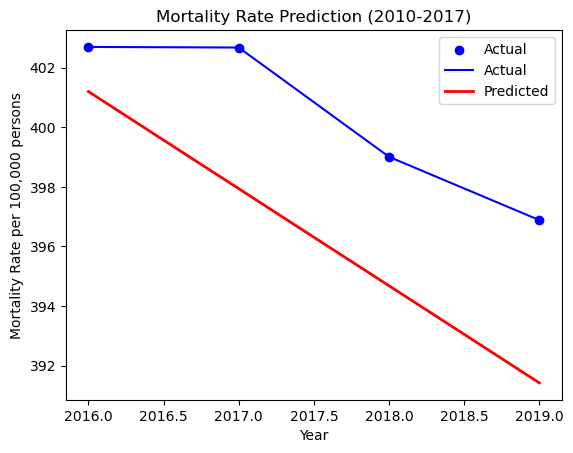

Intercept: 6972.51964957557
Coefficient: -3.2595835836929625
Mean Absolute error: 4.007251466918234


In [104]:
# Apply regresion model for the Year and MortalityRate and training the model with the numeric_df
filtered_df = numeric_df[(numeric_df['Year'] >= 2010) & (numeric_df['Year'] <= 2019)]

# Group by 'Year' and calculate the mean 'MortalityRate'
grouped_df = filtered_df.groupby('Year').mean().reset_index()

# Define X and y
X = grouped_df[['Year']]
y = grouped_df['MortalityRate']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = grouped_df.loc[(grouped_df['Year'] >= 2010) & (grouped_df['Year'] <= 2015),'Year'].values.reshape(-1, 1)
y_train = grouped_df.loc[(grouped_df['Year'] >= 2010) & (grouped_df['Year'] <= 2015),'MortalityRate'].values

X_test = grouped_df.loc[(grouped_df['Year'] > 2015),'Year'].values.reshape(-1, 1)
y_test = grouped_df.loc[(grouped_df['Year'] > 2015),'MortalityRate'].values


# X_test = np.asarray([2020, 2021, 2022, 2023]).reshape(-1, 1)
# y_test = np.asarray([0,0,0,0]).reshape(-1, 1)
# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the results
# plt.scatter(X_test, y_test, color='blue', label='Actual')
# plt.scatter(X_train, y_train, color='blue', label='Actual')
# plt.plot(X_train, y_train, color='blue', label='Actual')
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Mortality Rate per 100,000 persons')
plt.title('Mortality Rate Prediction (2010-2017)')
plt.legend()
plt.show()

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Mean Absolute error: {np.mean(np.abs(y_test - y_pred))}")


In [88]:
grouped_df.head()

,Year,MortalityRate,ConfLow,ConfHigh,LocationID
0,2010,423.303115,371.128232,483.956795,30174.405908
1,2011,416.763918,365.563762,476.231014,30149.815878
2,2012,412.861134,362.544607,471.214737,30153.554711
3,2013,409.084740,358.619046,467.641089,30152.785212
4,2014,405.833895,355.602271,464.266304,30138.298844


In [89]:
numeric_df.to_csv('./output/numeric_mortality.csv', index=True)

In [90]:
temp_df = mortality_df[(mortality_df['Year'] >= 2010) & (mortality_df['Year'] <= 2019)]

In [91]:
temp_df[['Year', 'MortalityRate']].groupby('Year').mean().reset_index()

,Year,MortalityRate
0,2010,423.303115
1,2011,416.763918
2,2012,412.861134
3,2013,409.084740
4,2014,405.833895
5,2015,407.799322
6,2016,402.697874
7,2017,402.677369
8,2018,399.008014
9,2019,396.884826


In [92]:
temp_df.loc[:, 'Sex_Cat_codes'] = temp_df['Sex'].astype("category")
temp_df.loc[:, 'Sex_Cat_codes'] = temp_df.loc[:, 'Sex_Cat_codes'].cat.codes

In [93]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451146 entries, 0 to 1451145
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Year           1451146 non-null  int64  
 1   State          1451146 non-null  object 
 2   County         1451146 non-null  object 
 3   CauseOfDeath   1451146 non-null  object 
 4   MortalityRate  1451146 non-null  float64
 5   ConfLow        1451146 non-null  float64
 6   ConfHigh       1451146 non-null  float64
 7   AgeGroup       1451146 non-null  object 
 8   Race           1451146 non-null  object 
 9   Sex            1451146 non-null  object 
 10  LocationID     1451146 non-null  int64  
 11  Sex_Cat_codes  1451146 non-null  int8   
dtypes: float64(3), int64(2), int8(1), object(6)
memory usage: 123.2+ MB


In [94]:
temp_df.head()

,Year,State,County,CauseOfDeath,MortalityRate,ConfLow,ConfHigh,AgeGroup,Race,Sex,LocationID,Sex_Cat_codes
0,2016,AL,Autauga,All stroke,25.7,21.3,30.9,Ages 35-64 years,Overall,Overall,1001,1
1,2011,AL,Autauga,All stroke,29.5,22.9,39.7,Ages 35-64 years,Overall,Men,1001,0
2,2017,AL,Autauga,All stroke,33.6,25.4,44.1,Ages 35-64 years,Overall,Men,1001,0
3,2017,AL,Autauga,All heart disease,128.7,113.1,144.7,Ages 35-64 years,Overall,Overall,1001,1
4,2016,AL,Autauga,All heart disease,128.1,114.1,145.5,Ages 35-64 years,Overall,Overall,1001,1


In [110]:
year_sex_grouped_df = temp_df[['Year', 'MortalityRate','Sex_Cat_codes']].groupby(['Year','Sex_Cat_codes']).mean().reset_index()

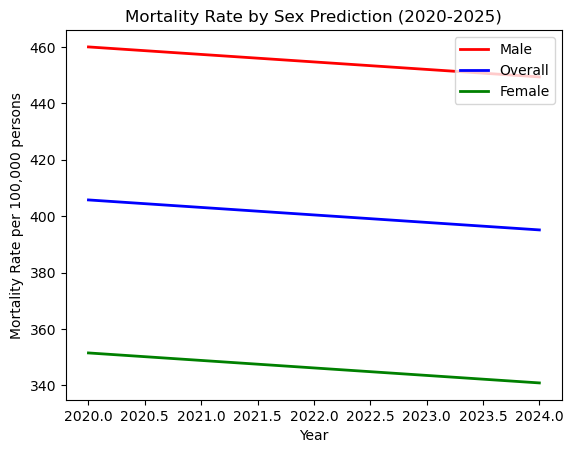

Intercept: 5831.057037502692
Coefficient: -2.658935321426243


In [114]:
# Add a category by sex to predict the next 5 years

X_train = year_sex_grouped_df[['Year','Sex_Cat_codes']].values
y_train = year_sex_grouped_df['MortalityRate'].values



# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Plot the results
# plt.scatter(X_test, y_test, color='blue', label='Actual')
# plt.scatter(X_train, y_train, color='blue', label='Actual')
# plt.plot(X_train, y_train, color='blue', label='Actual')
test_list = []
test_years = list(range(2020, 2025, 1))
test_x = {}
for s in [0,1,2]:
    test_x[s] = []
    for i in test_years:
        test_x[s].append([i,s])
for s, colors_, sex_ in zip(test_x.keys(), ['red', 'blue','green'], ['Male','Overall', 'Female']):
    X_test = np.asarray(test_x[s])
    y_test = np.asarray([0,0,0,0]).reshape(-1, 1)
    y_pred = model.predict(X_test)
    plt.plot(test_years, y_pred, color=colors_, linewidth=2, label=sex_)
    # plt.plot(test_years, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Mortality Rate per 100,000 persons')
plt.title('Mortality Rate by Sex Prediction (2020-2025)')
plt.legend()
plt.show()

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")